In [16]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.special as sc
from scipy.special import gamma, factorial

In [17]:
#-----------------------Physical constants----------------#
c = 1                   #  the speed of light is taken to be unity only for purpose of illustration

In [18]:
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [19]:
def func_FS(u_1g,u):
    Gamma = (1 + u**2)**0.5
    beta = u/Gamma
    
    Gamma_1 = (1 + u_1g**2)**0.5
    beta_1 = u_1g/Gamma_1
    
    Gamma_21 = Gamma_1*Gamma*(1-beta_1*beta)
    
    numero_FS = (1/(4*Gamma_21))*(u_1g/Gamma) - beta
    deno_FS = (1/(4*Gamma_21))*(Gamma_1/Gamma) - 1
    beta_FS = numero_FS/deno_FS
    Gamma_FS = 1/(1 - beta_FS**2)**0.5
    u_FS = beta_FS*Gamma_FS
    
    return u_FS

In [20]:
def func_RS(u_4g,u):
    Gamma = (1 + u**2)**0.5
    beta = u/Gamma
    
    Gamma_4 = (1 + u_4g**2)**0.5
    beta_4 = u_4g/Gamma_4
    
    Gamma_34 = Gamma_4*Gamma*(1-beta_4*beta)
    
    numero_RS = beta_4 - 4*Gamma_34*(u/Gamma_4)
    deno_RS = 1 - 4*Gamma_34*(Gamma/Gamma_4)
    beta_RS = numero_RS/deno_RS
    Gamma_RS = 1/(1 - beta_RS**2)**0.5
    u_RS = beta_RS*Gamma_RS
    
    return u_RS

In [21]:
au_minus_1 = 1    # Proper speed contrast minus one

#----------------------Quantities pertaining to shell S1----------------#
ton_1 = 0.1     # time of ejection of shell S1

u_1 = 3       # Proper speed of leading shell S1
Gamma_1 = (1 + u_1**2)**0.5
beta_1 = u_1/Gamma_1

Delta_10 = beta_1*c*ton_1    #initial radial width of shell S1

#-----------------------Quantities pertaining to shell S4-----------------#
ton_4 = ton_1          # time of ejection of shell S4
u_4 = (au_minus_1+1)*u_1
Gamma_4 = (1 + u_4**2)**0.5
beta_4 = u_4/Gamma_4

Delta_40 = beta_4*c*ton_4    # initial radial width of shell S4 

t_ej = ton_1                # time delay between the ejection of the two shells

chi = Delta_10/Delta_40    # The ratio of initial radial width of shell S1 to S4

print("The ratio of the initial radial widths of S1 to S4 is ",chi)
#---------------------In the rest frame of shell S1-----------------------#
beta_41 = (beta_4-beta_1)/(1 - beta_4*beta_1)
Gamma_41 = 1/(1 - beta_41**2)**0.5
u_41 = beta_41*Gamma_41

The ratio of the initial radial widths of S1 to S4 is  0.9617692030835672


In [22]:
#---------Proper density contrast for collision of equal energy shells-------#
f_en = chi*(Gamma_1*(Gamma_1 - 1))/(Gamma_4*(Gamma_4-1))


In [23]:
#-----Solving for the shocked fluid proper speed in the rest frame of shell S1------#
f = f_en
numero = 2*(f**1.5)*Gamma_41- f*(1+f)
deno = 2*f*(u_41**2 + Gamma_41**2) - (1 + f**2)
u_21 = u_41*np.sqrt(numero/deno)
Gamma_21 = np.sqrt(1 + u_21**2)
beta21 = u_21/Gamma_21

In [24]:
#---------------------Lorentz transforming to the lab frame----------------#
u = Gamma_21*Gamma_1*(beta_1 + beta21)
Gamma = np.sqrt(1+u**2)
beta = u/Gamma


In [25]:
#--------------------------Proper velocity of the forward shock front-----------#
u_FS = func_FS(u_1,u)
Gamma_FS = np.sqrt(1+u_FS**2)
beta_FS = u_FS/Gamma_FS

#------------------Proper velocity of the reverse shock front------------------#
u_RS = func_FS(u_4,u)
Gamma_RS = np.sqrt(1+u_RS**2)
beta_RS = u_RS/Gamma_RS
print(u_RS,u_FS)
print(beta_RS,beta_FS)
print((Gamma_FS/Gamma_RS)**2)

3.238852501505431 4.046971360051033
0.9554941401521032 0.970801680720399
1.5124218314333284


In [26]:
t_FS = Delta_10/(c*(beta_FS - beta_1))
DeltaR_FS = beta_FS*c*t_FS

R_o = (beta_4*beta_1*c*t_ej)/(beta_4-beta_1)


t_RS = Delta_40/(c*(beta_4 - beta_RS))
DeltaR_RS = beta_RS*c*t_RS



radial_FS = DeltaR_FS/R_o
radial_RS = DeltaR_RS/R_o


print(R_o/1e14)
print(radial_RS)
print(radial_FS)

2.4814635701269926e-14
1.2291788345362784
1.67799438393322


In [27]:
R_o = (beta_1*beta_4*c*t_ej)/(beta_4-beta_1)
T_ORS = R_o*(1-beta_RS)/(beta_RS*c)
T_OFS = R_o*(1-beta_FS)/(beta_FS*c)


In [28]:
ratio = ((Gamma_FS/Gamma_RS)**2)*(beta_FS/beta_RS)*((1+beta_FS)/(1+beta_RS))
T_barRS_f = radial_RS
T_barFS_f = radial_FS


In [29]:
T_barFS= np.array([0,0.5*T_barFS_f,T_barFS_f,1.1*T_barFS_f])
tilde_TFS = T_barFS+1

T_barRS= np.array([0,0.5*T_barRS_f,T_barRS_f,1.2*T_barRS_f])
tilde_TRS = T_barRS+1



num = 70000
theta = np.linspace(0, 2 * np.pi, 70000)


x_circ,y_circ = polar_to_cartesian(R_o, theta)
x_circ2,y_circ2 = polar_to_cartesian(R_o*(1+radial_RS), theta)
x_circ3,y_circ3 = polar_to_cartesian(R_o*(1+radial_FS), theta)



In [30]:
T_barRS3 = np.array([0,T_barFS_f/ratio,T_barRS_f])

tilde_TRS3 = T_barRS3 + 1

T_barFS3 = ((Gamma_FS/Gamma_RS)**2)*(beta_FS/beta_RS)*((1+beta_FS)/(1+beta_RS))*T_barRS3
tilde_TFS3 = T_barFS3+1



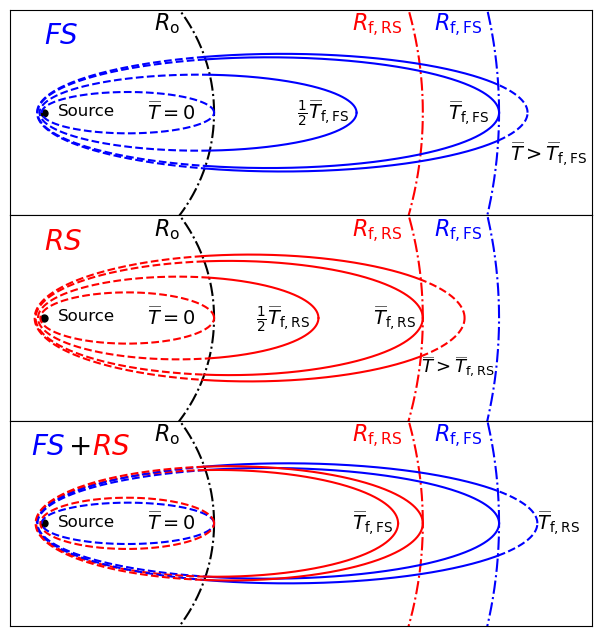

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,figsize=(8,8), sharex=True, subplot_kw=dict(frameon=True)) 

plt.subplots_adjust(hspace=.0)


ax1.tick_params(left = False, right = False , labelleft = False,labelbottom = False, bottom = False)
ax2.tick_params(left = False, right = False , labelleft = False,labelbottom = False, bottom = False)
ax3.tick_params(left = False, right = False , labelleft = False,labelbottom = False, bottom = False)

ax1.set_aspect(1.0) 
ax2.set_aspect(1.0) 
ax3.set_aspect(1.0) 


ax1.plot(x_circ, y_circ,color="black",ls="-.")
ax1.plot(x_circ2, y_circ2,color="red",ls="-.")
ax1.plot(x_circ3, y_circ3,color="blue",ls="-.")
ax1.set_xlim(-0.5,8)
ax1.set_ylim(-1.5,1.5)

ax2.plot(x_circ, y_circ,color="black",ls="-.")
ax2.plot(x_circ2, y_circ2,color="red",ls="-.")
ax2.plot(x_circ3, y_circ3,color="blue",ls="-.")
ax2.set_xlim(-0.5,8)
ax2.set_ylim(-1.5,1.5)



ax3.plot(x_circ, y_circ,color="black",ls="-.")
ax3.plot(x_circ2, y_circ2,color="red",ls="-.")
ax3.plot(x_circ3, y_circ3,color="blue",ls="-.")
#ax2.set_xlim(-0.5,2.8e11)
ax3.set_xlim(-0.5,8)
ax3.set_ylim(-1.5,1.5)


ax1.plot( 0, 0, "o",color='black',markersize=5)
ax2.plot( 0, 0, "o",color='black',markersize=5)
ax3.plot( 0, 0, "o",color='black',markersize=5)




for i in range(len(T_barFS)):
    
    e1 = beta_FS
    a1 = (Gamma_FS**2)*beta_FS*c*(T_OFS)*tilde_TFS[i]
    r1 = a1 * (1 - e1**2) / (1 - e1 * np.cos(theta))
    x1, y1 = polar_to_cartesian(r1, theta)

    if(i==0):
        ax1.plot(x1, y1,color="blue",ls="--")
        continue


    quant1R0 = (1/e1)*( 1 - ((a1*(1-e1**2))/R_o) )
    quant1RFS = (1/e1)*( 1 - ((a1*(1-e1**2))/(R_o*(1+radial_FS)) ) )

    
    if(quant1R0<1):
        theta_crit1R0 = np.arccos(quant1R0)
        index_up1R0 = np.where(theta>=theta_crit1R0)[0][0]
        index_do1R0 = np.where(theta>=2*np.pi-theta_crit1R0)[-1][0]
        ax1.plot(x1[index_up1R0:index_do1R0], y1[index_up1R0:index_do1R0],color="blue",ls="--")
    
    if(quant1RFS<1):
        theta_crit1RFS = np.arccos(quant1RFS)
        index_up1RFS = np.where(theta>=theta_crit1RFS)[0][0]
        index_do1RFS = np.where(theta>=2*np.pi-theta_crit1RFS)[-1][0]
        ax1.plot(x1[index_up1RFS:index_up1R0], y1[index_up1RFS:index_up1R0],color="blue",ls="-")
        ax1.plot(x1[index_do1R0:index_do1RFS], y1[index_do1R0:index_do1RFS],color="blue",ls="-")
        ax1.plot(x1[0:index_up1RFS], y1[0:index_up1RFS],color="blue",ls="--")
        ax1.plot(x1[index_do1RFS:num], y1[index_do1RFS:num],color="blue",ls="--")
    else:
        ax1.plot(x1[0:index_up1R0], y1[0:index_up1R0],color="blue",ls="-")
        ax1.plot(x1[index_do1R0:num], y1[index_do1R0:num],color="blue",ls="-")
        
        


for i in range(len(T_barRS)):

    e1 = beta_FS
    e2 = beta_RS
    a1 = (Gamma_FS**2)*beta_FS*c*(T_OFS)*tilde_TFS[i]
    a2 = (Gamma_RS**2)*beta_RS*c*(T_ORS)*tilde_TRS[i]
    r1 = a1 * (1 - e1**2) / (1 - e1 * np.cos(theta))
    r2 = a2 * (1 - e2**2) / (1 - e2 * np.cos(theta))
    x1, y1 = polar_to_cartesian(r1, theta)
    x2, y2 = polar_to_cartesian(r2, theta)
    if(i==0):
        ax2.plot(x2, y2,color="red",ls="--")
        continue


    quant1R0 = (1/e1)*( 1 - ((a1*(1-e1**2))/R_o) )
    quant1RFS = (1/e1)*( 1 - ((a1*(1-e1**2))/(R_o*(1+radial_FS)) ) )


    #quant2R0 = (1/e2)*( 1 - ((a2*(1-e2**2))/R_o) )
    quant2R0 = (1/e2)*( 1 - ((a2*(1-e2**2))/R_o) )

    quant2RRS = (1/e2)*( 1 - ((a2*(1-e2**2))/(R_o*(1+radial_RS)) ) )
    
        
    
    if(quant2R0<1):
        theta_crit2R0 = np.arccos(quant2R0)
        index_up2R0 = np.where(theta>=theta_crit2R0)[0][0]
        index_do2R0 = np.where(theta>=2*np.pi-theta_crit2R0)[-1][0]
        ax2.plot(x2[index_up2R0:index_do2R0], y2[index_up2R0:index_do2R0],color="red",ls="--")
    
    
    if(quant2RRS<1):
        theta_crit2RRS = np.arccos(quant2RRS)
        index_up2RRS = np.where(theta>=theta_crit2RRS)[0][0]
        index_do2RRS = np.where(theta>=2*np.pi-theta_crit2RRS)[-1][0]
        ax2.plot(x2[index_up2RRS:index_up2R0], y2[index_up2RRS:index_up2R0],color="red",ls="-")
        ax2.plot(x2[index_do2R0:index_do2RRS], y2[index_do2R0:index_do2RRS],color="red",ls="-")
        ax2.plot(x2[0:index_up2RRS], y2[0:index_up2RRS],color="red",ls="--")
        ax2.plot(x2[index_do2RRS:num], y2[index_do2RRS:num],color="red",ls="--")
    else:
        ax2.plot(x2[0:index_up2R0], y2[0:index_up2R0],color="red",ls="-")
        ax2.plot(x2[index_do2R0:num], y2[index_do2R0:num],color="red",ls="-")
    




for i in range(len(T_barRS3)):
    
    e1 = beta_FS
    e2 = beta_RS
   
    a1 = (Gamma_FS**2)*beta_FS*c*(T_OFS)*tilde_TFS3[i]
    a2 = (Gamma_RS**2)*beta_RS*c*(T_ORS)*tilde_TRS3[i]
    r1 = a1 * (1 - e1**2) / (1 - e1 * np.cos(theta))
    r2 = a2 * (1 - e2**2) / (1 - e2 * np.cos(theta))
    x1, y1 = polar_to_cartesian(r1, theta)
    x2, y2 = polar_to_cartesian(r2, theta)
    if(i==0):
        ax3.plot(x1, y1,color="blue",ls="--")
        ax3.plot(x2, y2,color="red",ls="--")
        continue


    quant1R0 = (1/e1)*( 1 - ((a1*(1-e1**2))/R_o) )
    quant1RFS = (1/e1)*( 1 - ((a1*(1-e1**2))/(R_o*(1+radial_FS)) ) )


    #quant2R0 = (1/e2)*( 1 - ((a2*(1-e2**2))/R_o) )
    quant2R0 = (1/e2)*( 1 - ((a2*(1-e2**2))/R_o) )

    quant2RRS = (1/e2)*( 1 - ((a2*(1-e2**2))/(R_o*(1+radial_RS)) ) )
    
    
    if(quant1R0<1):
        theta_crit1R0 = np.arccos(quant1R0)
        index_up1R0 = np.where(theta>=theta_crit1R0)[0][0]
        index_do1R0 = np.where(theta>=2*np.pi-theta_crit1R0)[-1][0]
        ax3.plot(x1[index_up1R0:index_do1R0], y1[index_up1R0:index_do1R0],color="blue",ls="--")
    
    if(quant1RFS<1):
        theta_crit1RFS = np.arccos(quant1RFS)
        index_up1RFS = np.where(theta>=theta_crit1RFS)[0][0]
        index_do1RFS = np.where(theta>=2*np.pi-theta_crit1RFS)[-1][0]
        ax3.plot(x1[index_up1RFS:index_up1R0], y1[index_up1RFS:index_up1R0],color="blue",ls="-")
        ax3.plot(x1[index_do1R0:index_do1RFS], y1[index_do1R0:index_do1RFS],color="blue",ls="-")
        ax3.plot(x1[0:index_up1RFS], y1[0:index_up1RFS],color="blue",ls="--")
        ax3.plot(x1[index_do1RFS:num], y1[index_do1RFS:num],color="blue",ls="--")
    else:
        ax3.plot(x1[0:index_up1R0], y1[0:index_up1R0],color="blue",ls="-")
        ax3.plot(x1[index_do1R0:num], y1[index_do1R0:num],color="blue",ls="-")
        
        
    
    if(quant2R0<1):
        theta_crit2R0 = np.arccos(quant2R0)
        index_up2R0 = np.where(theta>=theta_crit2R0)[0][0]
        index_do2R0 = np.where(theta>=2*np.pi-theta_crit2R0)[-1][0]
        ax3.plot(x2[index_up2R0:index_do2R0], y2[index_up2R0:index_do2R0],color="red",ls="--")
    
    
    if(quant2RRS<1):
        theta_crit2RRS = np.arccos(quant2RRS)
        index_up2RRS = np.where(theta>=theta_crit2RRS)[0][0]
        index_do2RRS = np.where(theta>=2*np.pi-theta_crit2RRS)[-1][0]
        ax3.plot(x2[index_up2RRS:index_up2R0], y2[index_up2RRS:index_up2R0],color="red",ls="-")
        ax3.plot(x2[index_do2R0:index_do2RRS], y2[index_do2R0:index_do2RRS],color="red",ls="-")
        ax3.plot(x2[0:index_up2RRS], y2[0:index_up2RRS],color="red",ls="--")
        ax3.plot(x2[index_do2RRS:num], y2[index_do2RRS:num],color="red",ls="--")
    else:
        ax3.plot(x2[0:index_up2R0], y2[0:index_up2R0],color="red",ls="-")
        ax3.plot(x2[index_do2R0:num], y2[index_do2R0:num],color="red",ls="-")
    

ax1.text(0.2,-0.05,"Source",fontsize=12)
ax2.text(0.2,-0.05,"Source",fontsize=12)
ax3.text(0.2,-0.05,"Source",fontsize=12)


ax1.text(1.5,-0.1,r"$\widebar{T} = 0$",fontsize=14)
ax1.text(3.7,-0.1,r"$\frac{1}{2} \widebar{T}_\mathrm{f,FS}$",fontsize=14)       
ax1.text(5.9,-0.1,r"$ \widebar{T}_\mathrm{f,FS}$",fontsize=14)       
ax1.text(6.8,-0.7,r"$ \widebar{T}> \widebar{T}_\mathrm{f,FS}$",fontsize=14)       


ax2.text(1.5,-0.1,r"$\widebar{T} = 0$",fontsize=14)
ax2.text(3.1,-0.1,r"$\frac{1}{2} \widebar{T}_\mathrm{f,RS}$",fontsize=14)  
ax2.text(4.8,-0.1,r"$ \widebar{T}_\mathrm{f,RS}$",fontsize=14)
ax2.text(5.5,-0.8,r"$ \widebar{T}> \widebar{T}_\mathrm{f,RS}$",fontsize=13)       


ax3.text(1.5,-0.1,r"$\widebar{T} = 0$",fontsize=14)
ax3.text(4.5,-0.1,r"$ \widebar{T}_\mathrm{f,FS}$",fontsize=14)
ax3.text(7.2,-0.1,r"$ \widebar{T}_\mathrm{f,RS}$",fontsize=14)

ax1.text(0.0,1.0,r"$FS$",color="blue",fontsize=20)
ax2.text(0.0,1.0,r"$RS$",color="red",fontsize=20)
#ax3.text(-0.2,1.0,r"$FS+RS$",color="black",fontsize=20)
ax3.text(-0.2,1.0,r"$FS$",color="blue",fontsize=20)
ax3.text(0.35,1.0,r"$+$",color="black",fontsize=20)
ax3.text(0.7,1.0,r"$RS$",color="red",fontsize=20)


ax1.text(1.6,1.2,r"$R_\mathrm{o}$",color="black",fontsize=16)
ax2.text(1.6,1.2,r"$R_\mathrm{o}$",color="black",fontsize=16)
ax3.text(1.6,1.2,r"$R_\mathrm{o}$",color="black",fontsize=16)

ax1.text(4.5,1.2,r"$R_\mathrm{f,RS}$",color="red",fontsize=16)
ax2.text(4.5,1.2,r"$R_\mathrm{f,RS}$",color="red",fontsize=16)
ax3.text(4.5,1.2,r"$R_\mathrm{f,RS}$",color="red",fontsize=16)


ax1.text(5.7,1.2,r"$R_\mathrm{f,FS}$",color="blue",fontsize=16)
ax2.text(5.7,1.2,r"$R_\mathrm{f,FS}$",color="blue",fontsize=16)
ax3.text(5.7,1.2,r"$R_\mathrm{f,FS}$",color="blue",fontsize=16)

#ax1.text(-0.5,1.0,r"$(A)$",color="black",fontsize=20)


#ax1.text(6,1.0,"Obs.",color="magenta",fontsize=13)

plt.savefig("EATS.png",bbox_inches='tight',dpi=300)

plt.show()